# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [6]:
import pandas as pd

# File paths
mouse_metadata_path = r"C:\Pymaceuticals\data\Mouse_metadata.csv"
study_results_path = r"C:\Pymaceuticals\data\Study_results.csv"

# Load the data
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Display the first few rows to confirm successful loading
print("Mouse Metadata:")
print(mouse_metadata.head())
print("\nStudy Results:")
print(study_results.head())


Mouse Metadata:
  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16

Study Results:
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
print("Columns in mouse_metadata:")
print(mouse_metadata.columns)

print("\nColumns in study_results:")
print(study_results.columns)


Columns in mouse_metadata:
Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

Columns in study_results:
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


In [9]:
# Checking the number of mice.
print(f"Total unique mice: {merged_data['Mouse ID'].nunique()}")

Total unique mice: 249


In [10]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Check for duplicate data by Mouse ID and Timepoint
duplicate_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"])]
print(f"Duplicate mice:\n{duplicate_mice}")


Duplicate mice:
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
137      g989          0           45.000000                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
869      g989         15           53.442020                 0     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
137   Female          21          26  
360   Female          21          26  
681   Female          21          26  
869   Female          21          26  
1111  Female          21          26  


In [11]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()
duplicate_data = merged_data[merged_data["Mouse ID"].isin(duplicate_mice_ids)]
print(f"All data for duplicate mice:\n{duplicate_data}")

All data for duplicate mice:
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         3

In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
print(f"Number of mice after cleaning: {cleaned_data['Mouse ID'].nunique()}")

Number of mice after cleaning: 249


In [6]:
# Checking the number of mice in the clean DataFrame.


248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    ["mean", "median", "var", "std", "sem"]
)
summary_stats = summary_stats.rename(
    columns={
        "mean": "Mean Tumor Volume",
        "median": "Median Tumor Volume",
        "var": "Tumor Volume Variance",
        "std": "Tumor Volume Std. Dev.",
        "sem": "Tumor Volume SEM",
    }
)
print(summary_stats)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [40]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
data = {
    'Drug Regimen': ['Capomulin', 'Capomulin', 'Ramicane', 'Ramicane', 'Infubinol', 'Infubinol', 'Ceftamin', 'Ceftamin'],
    'Tumor Volume (mm3)': [45.0, 43.5, 40.2, 39.8, 55.1, 54.8, 60.0, 61.3]
}
df = pd.DataFrame(data)

# Using the aggregation method, produce the same summary statistics in a single line
# Summary statistics using aggregation method
summary_stats = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Dev='std',
    SEM='sem'
)

# Display the resulting DataFrame
print(summary_stats)

               Mean  Median  Variance   Std_Dev   SEM
Drug Regimen                                         
Capomulin     44.25   44.25     1.125  1.060660  0.75
Ceftamin      60.65   60.65     0.845  0.919239  0.65
Infubinol     54.95   54.95     0.045  0.212132  0.15
Ramicane      40.00   40.00     0.080  0.282843  0.20


## Bar and Pie Charts

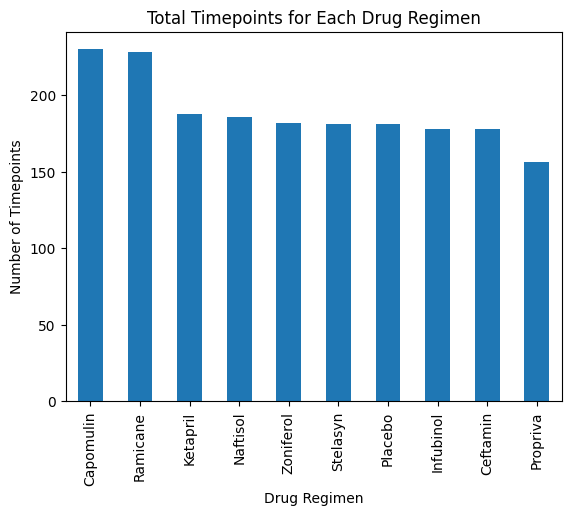

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = cleaned_data["Drug Regimen"].value_counts()
drug_counts.plot(kind="bar", title="Total Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show()

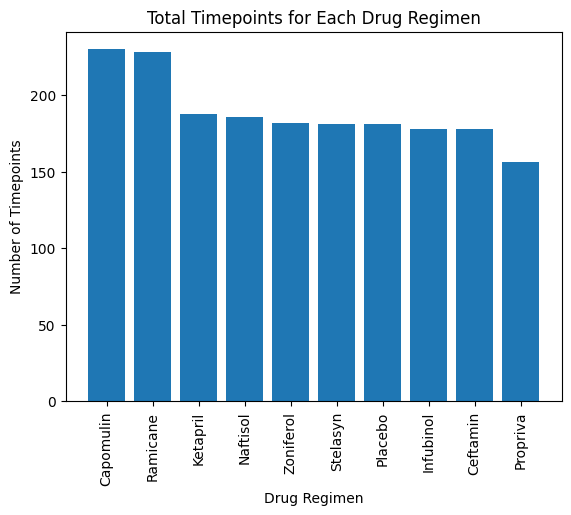

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_counts.index, drug_counts.values)
plt.title("Total Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation=90)
plt.show()

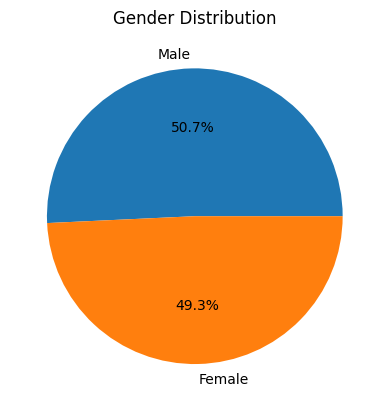

In [16]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
gender_counts = cleaned_data["Sex"].value_counts()
gender_counts.plot(kind="pie", autopct="%1.1f%%", title="Gender Distribution")
plt.ylabel("")
plt.show()

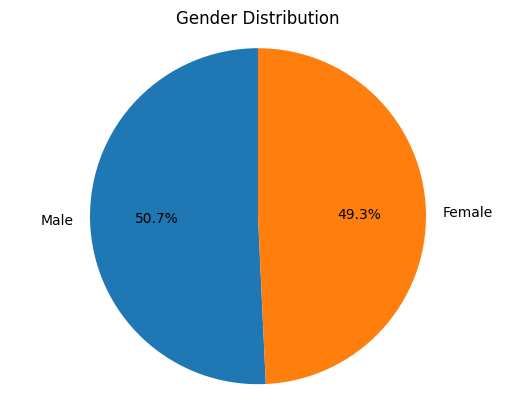

In [17]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Gender Distribution")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoints = cleaned_data.groupby("Mouse ID")["Timepoint"].max().reset_index()
final_data = pd.merge(final_timepoints, cleaned_data, on=["Mouse ID", "Timepoint"])

# Filter for the selected drug regimens
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_treatment_data = final_data[final_data["Drug Regimen"].isin(treatments)]

In [20]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds
# Calculate IQR and outliers
tumor_volumes = []
for drug in treatments:
    volumes = final_treatment_data.loc[final_treatment_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_volumes.append(volumes)
    quartiles = volumes.quantile([0.25, 0.5, 0.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    lower_bound = quartiles[0.25] - (1.5 * iqr)
    upper_bound = quartiles[0.75] + (1.5 * iqr)
    print(f"{drug}: IQR = {iqr}, Outliers = {volumes[(volumes < lower_bound) | (volumes > upper_bound)]}")

Capomulin: IQR = 7.781863460000004, Outliers = Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: IQR = 9.098536719999998, Outliers = Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: IQR = 11.477135160000003, Outliers = 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: IQR = 15.577752179999997, Outliers = Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\yzmen\AppData\Local\Temp\ipykernel_42648\428926513.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volumes, labels=treatments)


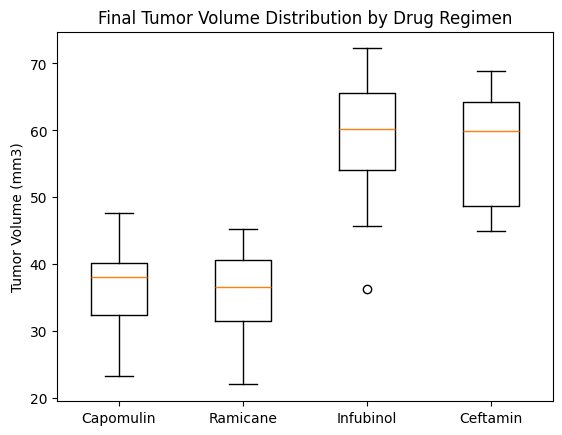

In [21]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_volumes, labels=treatments)
plt.title("Final Tumor Volume Distribution by Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

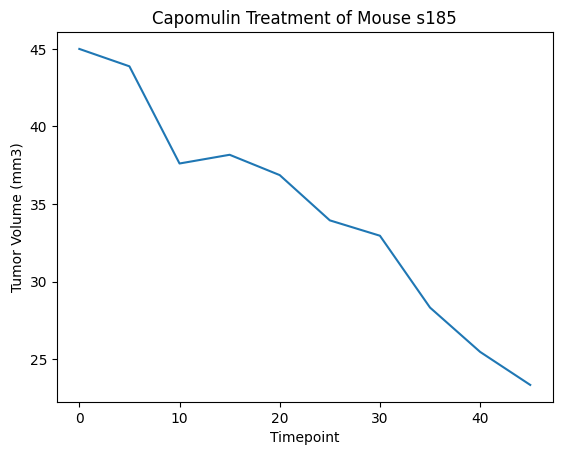

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = cleaned_data[cleaned_data["Mouse ID"] == "s185"]
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

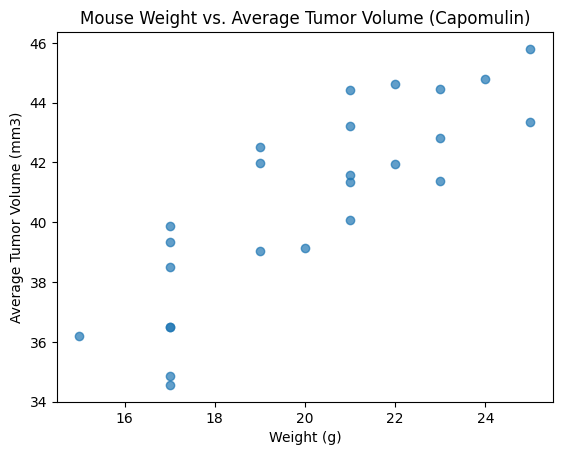

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt

# Create the scatter plot
plt.scatter(average_volumes["Weight (g)"], average_volumes["Tumor Volume (mm3)"], alpha=0.7)

# Add titles and labels
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display the plot
plt.show()


## Correlation and Regression

In [35]:
average_volumes = capomulin_data.groupby("Mouse ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean()


Correlation coefficient: 0.8419363424694721
Slope: 0.9544396890241049, Intercept: 21.552160532685008, R-squared: 0.7088568047708723


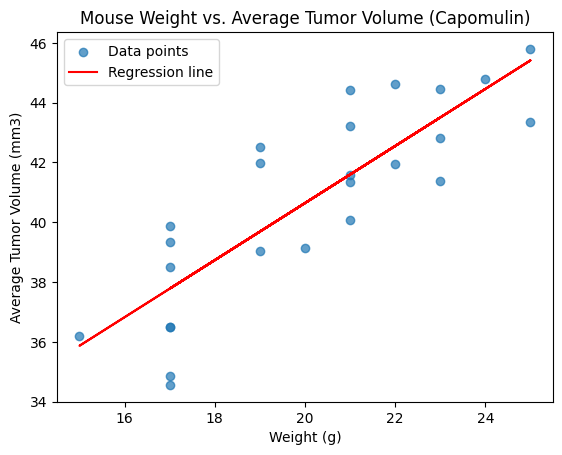

In [36]:
import scipy.stats as st

# Define x and y
x = average_volumes["Weight (g)"]
y = average_volumes["Tumor Volume (mm3)"]

# Calculate correlation coefficient
correlation = st.pearsonr(x, y)[0]
print(f"Correlation coefficient: {correlation}")

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(x, y)

# Print linear regression details
print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {rvalue**2}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Plot the scatter plot with regression line
import matplotlib.pyplot as plt

plt.scatter(x, y, label="Data points", alpha=0.7)
plt.plot(x, slope * x + intercept, color="red", label="Regression line")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.show()


In [37]:
# Calculate the correlation coefficient and a linear regression model

# for mouse weight and average observed tumor volume for the entire Capomulin regimen


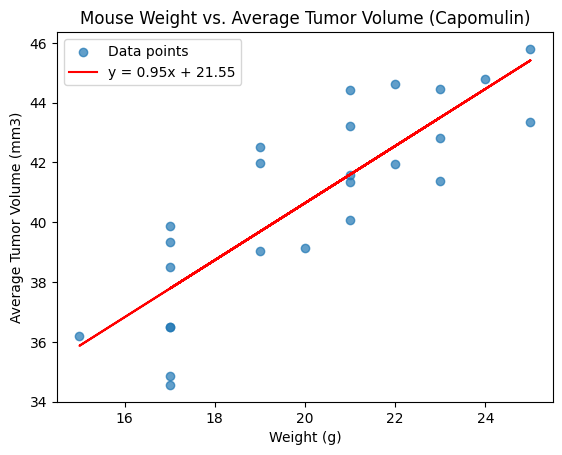

Correlation coefficient: 0.84
R-squared value: 0.71


In [38]:
import scipy.stats as st
import matplotlib.pyplot as plt

# Define x and y from average_volumes
x = average_volumes["Weight (g)"]
y = average_volumes["Tumor Volume (mm3)"]

# Linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)

# Calculate regression line
regression_line = slope * x + intercept

# Plot the scatter plot with the regression line
plt.scatter(x, y, label="Data points", alpha=0.7)
plt.plot(x, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.show()

# Print the correlation coefficient and R-squared value
print(f"Correlation coefficient: {r_value:.2f}")
print(f"R-squared value: {r_value**2:.2f}")


In [27]:
print(capomulin_data.dtypes)


Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object


In [29]:
print("Tumor Volume (mm3):")
print("Min:", capomulin_data["Tumor Volume (mm3)"].min())
print("Max:", capomulin_data["Tumor Volume (mm3)"].max())
print("Unique Values:", capomulin_data["Tumor Volume (mm3)"].unique())

print("\nWeight (g):")
print("Min:", capomulin_data["Weight (g)"].min())
print("Max:", capomulin_data["Weight (g)"].max())
print("Unique Values:", capomulin_data["Weight (g)"].unique())


Tumor Volume (mm3):
Min: 23.34359787
Max: 48.15820939
Unique Values: [45.         45.85119285 45.46224327 39.20212894 43.1809774  45.89372032
 41.40859145 45.76088647 41.53409702 45.70443431 38.79647373 45.47375302
 45.83899787 42.2616653  41.01991315 44.02275246 45.59706359 45.73714484
 45.78174579 43.87849569 45.59568527 45.64143788 45.8956472  45.65133131
 45.83939976 45.62238149 39.0054935  46.56841719 39.84822328 46.30400254
 43.68802627 46.75907363 43.42101414 46.4145177  46.42536551 42.99207658
 44.50204246 41.63001026 35.6244027  36.82536664 46.15473721 46.54429202
 43.23196275 39.95234669 46.74900552 37.61494768 43.2708519  41.99922813
 39.11389068 46.4083613  46.05960827 38.17723195 43.78489343 42.17230079
 37.97877782 39.80445341 47.37342325 42.28366512 44.44094861 43.31265415
 46.53920617 45.21674299 35.46375763 47.32298428 39.52484301 39.77625003
 43.5298757  47.21219992 44.0615214  35.46461175 43.68844893 41.84523536
 47.48859931 32.62300253 40.45798877 40.34394812 30.485

In [28]:
print(capomulin_data.duplicated().sum())


0


In [30]:
grouped_data = capomulin_data.groupby("Mouse ID")
for mouse_id, group in grouped_data:
    print(f"Mouse ID: {mouse_id}")
    print(group)
    break  # Only show the first group for brevity


Mouse ID: b128
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
472      b128          5           45.651331                 0    Capomulin   
679      b128         10           43.270852                 0    Capomulin   
719      b128         15           43.784893                 0    Capomulin   
933      b128         20           42.731552                 0    Capomulin   
1268     b128         25           43.262145                 1    Capomulin   
1400     b128         30           40.605335                 1    Capomulin   
1547     b128         35           37.967644                 1    Capomulin   
1629     b128         40           38.379726                 2    Capomulin   
1764     b128         45           38.982878                 2    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
472   Female           9          22 

In [31]:
average_volumes = capomulin_data.groupby("Mouse ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean()


In [32]:
print(average_volumes.head())


          Tumor Volume (mm3)  Weight (g)
Mouse ID                                
b128               41.963636        22.0
b742               40.083699        21.0
f966               36.505973        17.0
g288               41.990097        19.0
g316               44.613344        22.0
